In [2]:
from amadeus_helpers import find_flights, parse_flights
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Define query parameters
origin = "SYD"
destination = "LON"
num_adults = 2
departure_range = pd.date_range(start="2023-03-17",end="2023-03-24")
return_range = pd.date_range(start="2023-07-26", end="2023-07-30")



In [4]:
# Verify data converts correctly
departure_date = departure_range[0].strftime("%Y-%m-%d")
departure_date

'2023-03-17'

In [5]:
flights_df = pd.DataFrame(columns=["ID", "Airline", "Number of Stops", "Origin", "Destination",
                                       "Departure", "Arrival", "Duration", "Baggage", "Price", "Currency"])

for departure_date in departure_range:
    # Convert departure date to string
    departure_date = departure_date.strftime("%Y-%m-%d")

    for return_date in return_range:
        # Convert return date to string
        return_date = return_date.strftime("%Y-%m-%d")
        
        # Query database
        flights = find_flights(origin, destination, departure_date, return_date, num_adults)

        # Generate flights dataframe
        flights_df = flights_df.append(parse_flights(flights))



Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...


In [6]:
# Save to load in future if needed
flights_df.to_csv("./data/output/JGT-search2.csv")

In [7]:
# Convert price to float to prepare for plotting
flights_df["Price"] = flights_df["Price"].astype(float)
flights_df = flights_df.set_index("ID")

# Create new dataframe for price analysis with only required rows included
price_df = flights_df.drop(columns=["Number of Stops", "Currency", "Duration", "Baggage", "Airline Code"])
price_df.head()

,Airline,Origin,Destination,Departure,Arrival,Price
ID,,,,,,
1,EMIRATES SKY CARGO,SYD,LHR,2023-03-17T06:00:00,2023-07-28T05:10:00,2871.82
2,QANTAS AIRWAYS LTD.,SYD,LHR,2023-03-17T17:05:00,2023-07-28T05:10:00,2876.22
3,QANTAS AIRWAYS LTD.,SYD,LHR,2023-03-17T15:25:00,2023-07-28T05:10:00,2896.62
4,QANTAS AIRWAYS LTD.,SYD,LHR,2023-03-17T06:00:00,2023-07-28T05:10:00,2911.02
5,UNKNOWN,SYD,LHR,2023-03-17T18:15:00,2023-07-27T22:00:00,4488.42


In [8]:
# Validate that departure and arrival times are strings
price_df.dtypes

Airline         object
Origin          object
Destination     object
Departure       object
Arrival         object
Price          float64
dtype: object

In [9]:
# Split Departure and Arrival times so that they only include date
price_df["Departure"] = price_df["Departure"].apply(lambda x: x.split('T')[0])
price_df["Arrival"] = price_df["Arrival"].apply(lambda x: x.split('T')[0])
price_df.head()

,Airline,Origin,Destination,Departure,Arrival,Price
ID,,,,,,
1,EMIRATES SKY CARGO,SYD,LHR,2023-03-17,2023-07-28,2871.82
2,QANTAS AIRWAYS LTD.,SYD,LHR,2023-03-17,2023-07-28,2876.22
3,QANTAS AIRWAYS LTD.,SYD,LHR,2023-03-17,2023-07-28,2896.62
4,QANTAS AIRWAYS LTD.,SYD,LHR,2023-03-17,2023-07-28,2911.02
5,UNKNOWN,SYD,LHR,2023-03-17,2023-07-27,4488.42


In [10]:
# Group by mean price per departure and return
grouped_price = price_df.groupby(["Departure", "Arrival"])["Price"].mean()
grouped_price = pd.DataFrame(grouped_price)
grouped_price = grouped_price.reset_index()
grouped_price.head()

,Departure,Arrival,Price
0,2023-03-17,2023-07-27,4499.012683
1,2023-03-17,2023-07-28,4434.647723
2,2023-03-17,2023-07-29,4413.175340
3,2023-03-17,2023-07-30,4415.854951
4,2023-03-17,2023-07-31,4387.639277


In [11]:
# Concatenate Departure and Arrival for graphing
grouped_price["Date Range"] = grouped_price["Departure"] + ": " + grouped_price["Arrival"]
grouped_price

,Departure,Arrival,Price,Date Range
0,2023-03-17,2023-07-27,4499.012683,2023-03-17: 2023-07-27
1,2023-03-17,2023-07-28,4434.647723,2023-03-17: 2023-07-28
2,2023-03-17,2023-07-29,4413.175340,2023-03-17: 2023-07-29
3,2023-03-17,2023-07-30,4415.854951,2023-03-17: 2023-07-30
4,2023-03-17,2023-07-31,4387.639277,2023-03-17: 2023-07-31
5,2023-03-17,2023-08-01,3233.954161,2023-03-17: 2023-08-01
6,2023-03-18,2023-07-27,4499.133253,2023-03-18: 2023-07-27
7,2023-03-18,2023-07-28,4450.612079,2023-03-18: 2023-07-28
8,2023-03-18,2023-07-29,4500.841569,2023-03-18: 2023-07-29
9,2023-03-18,2023-07-30,4455.364554,2023-03-18: 2023-07-30


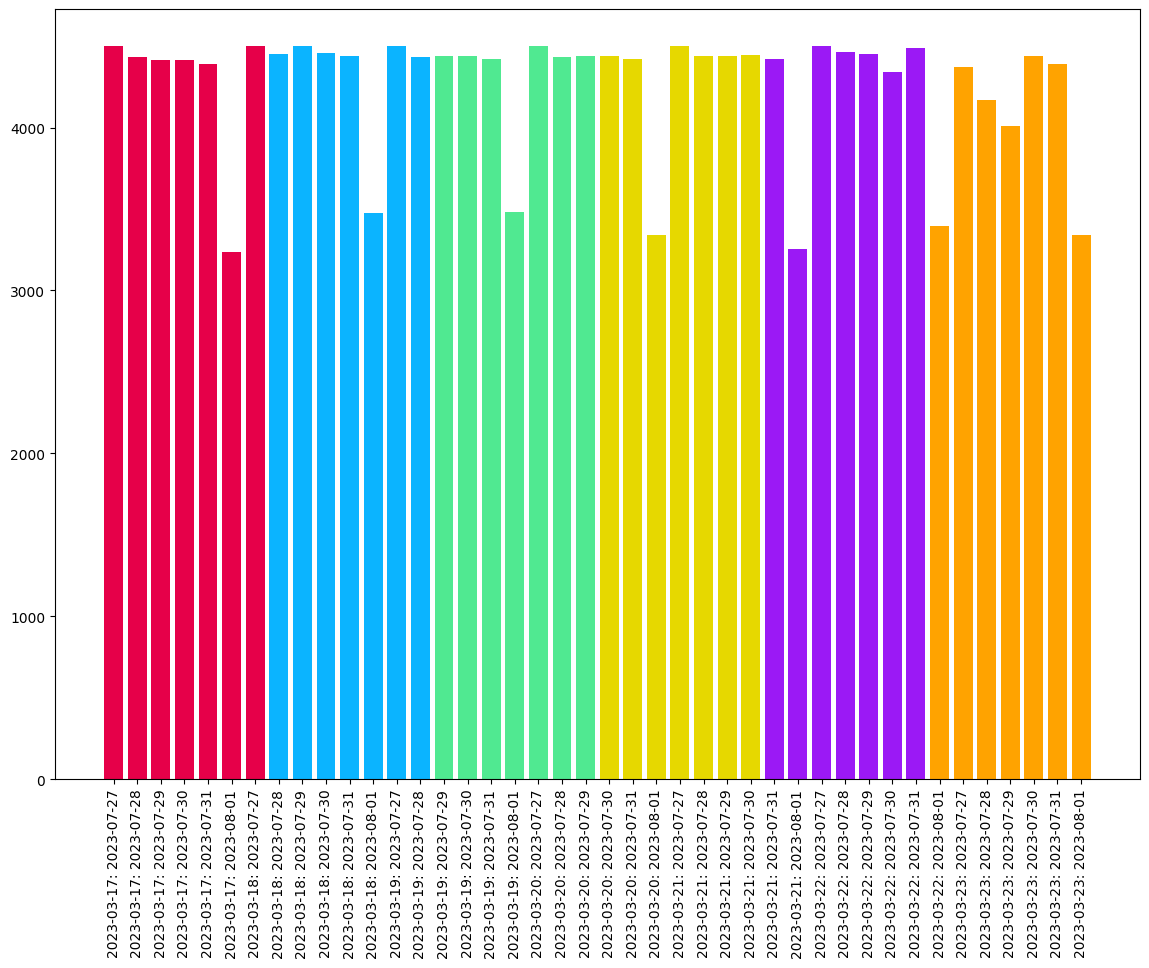

In [12]:
# Graph average price per departure/arrival date
fig, ax = plt.subplots(figsize=(14,10))
plt.xticks(rotation="vertical")

# Use departure range as index to color so that all flights on a given departure date are colored the same
prev_rows = 0
color_list = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]
for index, row_num in enumerate(range(len(departure_range)-1, len(grouped_price)-1, len(departure_range)-1)):
    ax.bar(grouped_price.iloc[prev_rows:row_num]["Date Range"], grouped_price.iloc[prev_rows:row_num]["Price"], color=color_list[index])
    prev_rows = row_num

In [13]:
# Highlight minimum values
sorted_price = grouped_price.sort_values("Price")
sorted_price.head()

,Departure,Arrival,Price,Date Range
5,2023-03-17,2023-08-01,3233.954161,2023-03-17: 2023-08-01
29,2023-03-21,2023-08-01,3255.413731,2023-03-21: 2023-08-01
23,2023-03-20,2023-08-01,3339.322796,2023-03-20: 2023-08-01
41,2023-03-23,2023-08-01,3340.776949,2023-03-23: 2023-08-01
35,2023-03-22,2023-08-01,3396.210888,2023-03-22: 2023-08-01


In [14]:
# Define price threshold
price_threshold = sorted_price.mean() - sorted_price["Price"].std()
price_threshold

Price    3845.314212
dtype: float64

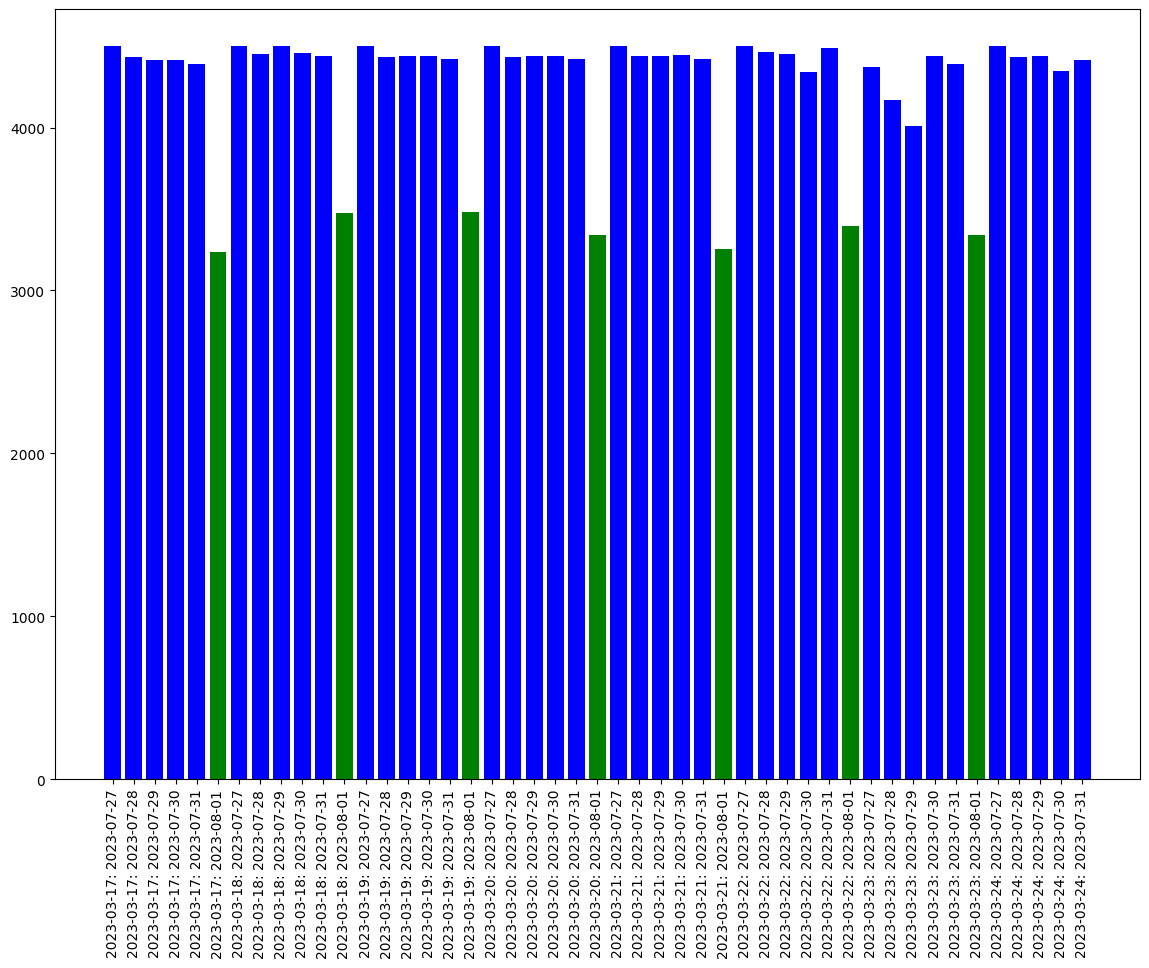

In [15]:
# Graph average price per departure/arrival date
fig, ax = plt.subplots(figsize=(14,10))
plt.xticks(rotation="vertical")

# Use departure range as index to color so that all flights on a given departure date are colored the same
color_list = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]
for row_num in range(len(grouped_price)-1):
    if grouped_price.iloc[row_num]["Price"] <= float(price_threshold):
        ax.bar(grouped_price.iloc[row_num]["Date Range"], grouped_price.iloc[row_num]["Price"], color="green")
    else:
        ax.bar(grouped_price.iloc[row_num]["Date Range"], grouped_price.iloc[row_num]["Price"], color="blue")